In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/Users/yugsingh/Desktop/Data_Science/BrillicaClass/Algo_Notebook/Logistic Regression/Employee_Performance.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Checking NaN Data

In [4]:
df.shape==df.dropna().shape

True

# Questions:
Department wise performances.
Top 3 Important Factors affecting employee performances.
A trained model which can predict whether to hire employees.
Reommendations to improve employee performances based on insights from analysis.

# Number of Males and Females

Number_of males 725
Number of Females 475


Text(0, 0.5, 'No of Employees')

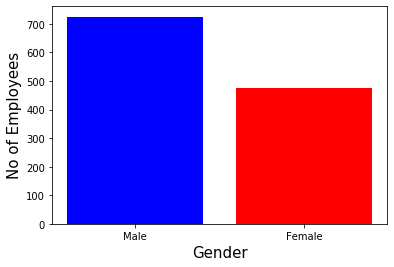

In [5]:
dfg=df.groupby(by='Gender')
males=list(dfg.get_group('Male').count())
number_of_males=males[0]

females=list(dfg.get_group('Female').count())
number_of_females=females[0]
print('Number_of males',number_of_males)
print("Number of Females",number_of_females)
gender_data=[number_of_males,number_of_females]
gender_type=['Male','Female']
plt.bar(gender_type,gender_data,color=['Blue','Red'])
plt.xlabel('Gender',fontsize=15)
plt.ylabel('No of Employees',fontsize=15)

# Number of Departments and Name of Department

In [6]:
df_dept=df['EmpDepartment'].nunique()
print('Number of departments',df_dept)
name_departments=set(df['EmpDepartment'])
print("Name of departments",name_departments)

Number of departments 6
Name of departments {'Sales', 'Human Resources', 'Research & Development', 'Development', 'Finance', 'Data Science'}


# Department wise Performance

In [7]:
depart_performance=df.groupby(['EmpDepartment','PerformanceRating'])
depart_performance.first()

EmpNumber  Age  Gender  \
EmpDepartment          PerformanceRating                          
Data Science           2                   E100630   40    Male   
                       3                  E1001165   49  Female   
                       4                   E100645   31    Male   
Development            2                   E100285   27    Male   
                       3                  E1001019   28  Female   
                       4                  E1001011   27    Male   
Finance                2                  E1001868   29    Male   
                       3                  E1001870   23    Male   
                       4                  E1001932   39    Male   
Human Resources        2                  E1001376   44    Male   
                       3                  E1001009   41    Male   
                       4                  E1001509   42    Male   
Research & Development 2                  E1001293   30  Female   
                       3                  E1001284   38    Male   
                       4                  E1001352   55    Male   
Sales                  2                  E1001248   37    Male   
                       3                  E1001000   32    Male   
                       4                  E1001007   40    Male   

                                         EducationBackground MaritalStatus  \
EmpDepartment          PerformanceRating                                     
Data Science           2                             Medical      Divorced   
                       3                    Technical Degree       Married   
                       4                             Medical       Married   
Development            2                             Medical       Married   
                       3                       Life Sciences        Single   
                       4                       Life Sciences      Divorced   
Finance                2                       Life Sciences      Divorced   
                       3                    Technical Degree       Married   
                       4                             Medical       Married   
Human Resources        2                             Medical       Married   
                       3                     Human Resources      Divorced   
                       4                             Medical       Married   
Research & Development 2                       Life Sciences       Married   
                       3                             Medical       Married   
                       4                             Medical        Single   
Sales                  2                       Life Sciences       Married   
                       3                           Marketing        Single   
                       4                       Life Sciences       Married   

                                                  EmpJobRole  \
EmpDepartment          PerformanceRating                       
Data Science           2                      Data Scientist   
                       3                      Data Scientist   
                       4                      Data Scientist   
Development            2                           Developer   
                       3                           Developer   
                       4                           Developer   
Finance                2                     Finance Manager   
                       3                     Finance Manager   
                       4                     Finance Manager   
Human Resources        2                     Human Resources   
                       3                             Manager   
                       4                     Human Resources   
Research & Development 2                   Research Director   
                       3                  Senior Manager R&D   
                       4                             Manager   
Sales                  2                     Sales 

In [8]:
print("Number of person in rating according to department")
print(depart_performance.size())

Number of person in rating according to department
EmpDepartment           PerformanceRating
Data Science            2                      1
                        3                     17
                        4                      2
Development             2                     13
                        3                    304
                        4                     44
Finance                 2                     15
                        3                     30
                        4                      4
Human Resources         2                     10
                        3                     38
                        4                      6
Research & Development  2                     68
                        3                    234
                        4                     41
Sales                   2                     87
                        3                    251
                        4                     35
dtype: int64


# Department wise performance

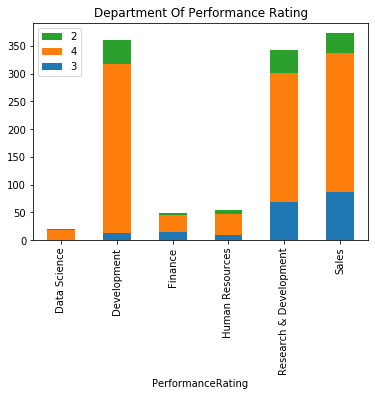

In [9]:
df.assign(dummy=1).groupby(['EmpDepartment','PerformanceRating']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.title("Department Of Performance Rating")
plt.xlabel('PerformanceRating')
current_handles,_=plt.gca().get_legend_handles_labels()
reversed_handles=reversed(current_handles)
labels=reversed(df['PerformanceRating'].unique())
plt.legend(reversed_handles,labels,loc='best',)
plt.show()

# Number Of Employees- Acc to Rating

[194, 874, 132]


Text(0.5, 1.0, 'No. Of Employees acc to Rating')

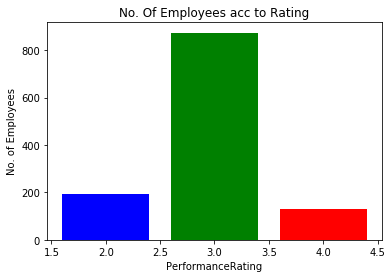

In [10]:
rating_count=list(depart_performance.size().groupby(level=1).sum())
print(rating_count)
rating=[2,3,4]
plt.bar(rating,rating_count,color=['blue','green','red'])
plt.xlabel("PerformanceRating",fontsize=10)
plt.ylabel("No. of Employees",fontsize=10)
#plt.yticks(rating,rating_count,fontsize=10)
plt.title('No. Of Employees acc to Rating')


In [11]:
number_employees_departmentwise=list(depart_performance.size().groupby(level=0).sum())
number_employees_departmentwise

[20, 361, 49, 54, 343, 373]

# Total number of employees in a department

Text(0, 0.5, 'No.of Employees')

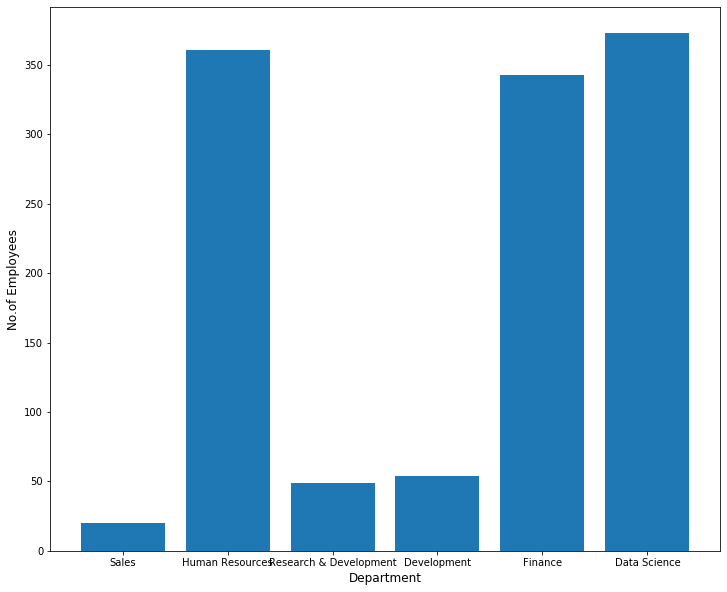

In [12]:
plt.figure(figsize=(12,10))
plt.bar(list(name_departments),number_employees_departmentwise)
plt.xlabel('Department',fontsize=12)
plt.ylabel("No.of Employees",fontsize=12)

# Visualization

In [13]:
import seaborn as sns

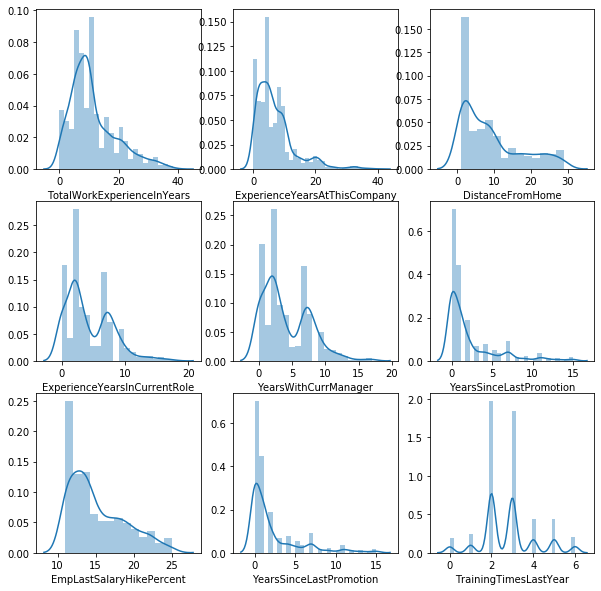

In [14]:
fig,ax=plt.subplots(3,3,figsize=(10,10))#ax has references to all the four axes
sns.distplot(df['TotalWorkExperienceInYears'],ax=ax[0,0])
sns.distplot(df['ExperienceYearsAtThisCompany'],ax=ax[0,1])
sns.distplot(df['DistanceFromHome'],ax=ax[0,2])
sns.distplot(df['ExperienceYearsInCurrentRole'],ax=ax[1,0])
sns.distplot(df['YearsWithCurrManager'],ax=ax[1,1])
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[1,2])
sns.distplot(df['EmpLastSalaryHikePercent'],ax=ax[2,0])
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[2,1])
sns.distplot(df['TrainingTimesLastYear'],ax=ax[2,2])
